**Imports and workspace setting**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

**Loading data file**

In [3]:
cancerData = pd.read_csv('../data/breast-cancer-wisconsin.data', header=None)
cancerData.drop(cancerData.columns[0],axis=1,inplace=True)
cancerData = cancerData.replace('?', np.nan)
cancerData.head()

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


**Stats of the data**

In [4]:
cancerData.shape

(699, 10)

**Class distribution of benign (2) and malignant (4)**

Class distribution is skewed towards benign.

Text(0.5, 0, 'Class')

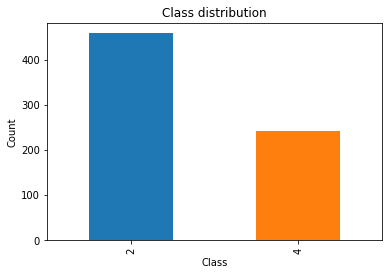

In [5]:
axes = cancerData[10].value_counts().plot(kind='bar', title='Class distribution')
axes.set_ylabel('Count')
axes.set_xlabel('Class')

**Drop missing values (16 values with ? mark)**

In [6]:
cancerDataAfterMissingValuesDropped = cancerData.dropna()
cancerDataAfterMissingValuesDropped.shape

(683, 10)

In [7]:
y = cancerDataAfterMissingValuesDropped.values[:,-1]
y=y.astype('int')
y.shape

(683,)

In [8]:
X = cancerDataAfterMissingValuesDropped.values[:,:-1]
X=X.astype('int')
X.shape

(683, 9)

**Holdout to create training (65%) and testing (35%) dataset**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=8)
print (str(X_train.shape) +","+ str(y_train.shape))
print (str(X_test.shape) +","+ str(y_test.shape))

(443, 9),(443,)
(240, 9),(240,)


**Fit Multinomial Naive Bayes model**

In [10]:
multinomialNB = MultinomialNB()
multinomialNB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
predictions = multinomialNB.predict(X_test)

In [12]:
# Use score method to get accuracy of model
score = multinomialNB.score(X_test, y_test)

print('Accuracy score = ', score)
print('Precision score = ', metrics.precision_score(y_test, predictions, average=None))
print('Recall score = ', metrics.recall_score(y_test, predictions, average=None))
print('F1 score score = ', metrics.f1_score(y_test, predictions, average=None))

Accuracy score =  0.8958333333333334
Precision score =  [0.88607595 0.91463415]
Recall score =  [0.95238095 0.80645161]
F1 score score =  [0.91803279 0.85714286]


**Confusion metrix**

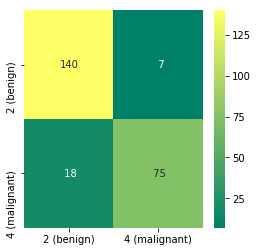

In [13]:
cm = metrics.confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(4,4))
ticklabels = ["2 (benign)","4 (malignant)"]
ax = sns.heatmap(cm, xticklabels=ticklabels, yticklabels=ticklabels, annot=True, fmt='3.0f',cmap="summer")

**Conclusion**
01. Model works fairly well and provides around 90% accuracy.
02. Recall and F1 score are reduced for Malignant class, might be due to class skewness.
03. naiveBayes gives the lowest results out of all the classifiers tested so far.